In [542]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [543]:
route = "../source/WDIData_clean.csv"
country_route = "../source/WDICountry.csv"

df = pd.read_csv(route)

In [544]:
df.head()

,Country Name,Country Code,Year,Access to clean fuels and technologies for cooking (% of population),"Access to clean fuels and technologies for cooking, rural (% of rural population)","Access to clean fuels and technologies for cooking, urban (% of urban population)",Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)","Adjusted net enrollment rate, primary (% of primary school age children)",...,Voice and Accountability: Standard Error,"Vulnerable employment, female (% of female employment) (modeled ILO estimate)","Vulnerable employment, male (% of male employment) (modeled ILO estimate)","Vulnerable employment, total (% of total employment) (modeled ILO estimate)","Wage and salaried workers, female (% of female employment) (modeled ILO estimate)","Wage and salaried workers, male (% of male employment) (modeled ILO estimate)","Wage and salaried workers, total (% of total employment) (modeled ILO estimate)","Water productivity, total (constant 2015 US$ GDP per cubic meter of total freshwater withdrawal)",Women Business and the Law Index Score (scale 1-100),Women's share of population ages 15+ living with HIV (%)
0,Afghanistan,AFG,2001,7.7,1.4,34.4,9.294527,NaN,74.786224,NaN,...,NaN,97.894737,90.56201,91.65715,2.060760,8.970146,7.938208,NaN,26.25,27.8
1,Afghanistan,AFG,2002,8.8,1.6,38.6,14.133616,NaN,76.125900,NaN,...,0.189453,98.329038,90.51089,91.68622,1.628022,9.016659,7.905921,0.372507,26.25,27.8
2,Afghanistan,AFG,2003,10.0,1.9,43.2,18.971165,2.130410,77.470428,NaN,...,0.207045,98.342650,90.37329,91.58128,1.612625,9.141744,8.000525,0.405408,26.25,27.9
3,Afghanistan,AFG,2004,11.1,2.3,47.4,23.814182,7.842795,78.826736,NaN,...,0.175590,98.186126,90.18858,91.41148,1.766770,9.316711,8.162234,0.411140,26.25,28.0
4,Afghanistan,AFG,2005,12.5,2.7,51.7,28.669672,15.355643,74.000000,NaN,...,0.173295,98.247341,90.01552,91.28550,1.703261,9.478732,8.279169,0.457310,26.25,28.2


In [545]:
countries = pd.read_csv(country_route)

In [546]:
# Capture: Country Code, Country Name, Region, Income Group, 'GDP (current US$)' using merge with df and countries

df = pd.merge(df, countries[['Country Code', 'Region', 'Income Group']], on='Country Code', how='left')

df = df.rename(columns={'GDP (current US$)': 'GDP'})

# Change position of 'GDP' column

cols = list(df.columns.values)
cols.pop(cols.index('GDP'))
df = df[cols+['GDP']]

df.head()




,Country Name,Country Code,Year,Access to clean fuels and technologies for cooking (% of population),"Access to clean fuels and technologies for cooking, rural (% of rural population)","Access to clean fuels and technologies for cooking, urban (% of urban population)",Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)","Adjusted net enrollment rate, primary (% of primary school age children)",...,"Vulnerable employment, total (% of total employment) (modeled ILO estimate)","Wage and salaried workers, female (% of female employment) (modeled ILO estimate)","Wage and salaried workers, male (% of male employment) (modeled ILO estimate)","Wage and salaried workers, total (% of total employment) (modeled ILO estimate)","Water productivity, total (constant 2015 US$ GDP per cubic meter of total freshwater withdrawal)",Women Business and the Law Index Score (scale 1-100),Women's share of population ages 15+ living with HIV (%),Region,Income Group,GDP
0,Afghanistan,AFG,2001,7.7,1.4,34.4,9.294527,NaN,74.786224,NaN,...,91.65715,2.060760,8.970146,7.938208,NaN,26.25,27.8,South Asia,Low income,NaN
1,Afghanistan,AFG,2002,8.8,1.6,38.6,14.133616,NaN,76.125900,NaN,...,91.68622,1.628022,9.016659,7.905921,0.372507,26.25,27.8,South Asia,Low income,3.854235e+09
2,Afghanistan,AFG,2003,10.0,1.9,43.2,18.971165,2.130410,77.470428,NaN,...,91.58128,1.612625,9.141744,8.000525,0.405408,26.25,27.9,South Asia,Low income,4.539497e+09
3,Afghanistan,AFG,2004,11.1,2.3,47.4,23.814182,7.842795,78.826736,NaN,...,91.41148,1.766770,9.316711,8.162234,0.411140,26.25,28.0,South Asia,Low income,5.220825e+09
4,Afghanistan,AFG,2005,12.5,2.7,51.7,28.669672,15.355643,74.000000,NaN,...,91.28550,1.703261,9.478732,8.279169,0.457310,26.25,28.2,South Asia,Low income,6.226199e+09


In [547]:
# Save: df to csv

df.to_csv('../source/WDIData_clean_GDP.csv', index=False)

In [548]:
# Drop rows with Income Group = NaN values

df = df.dropna(subset=['Income Group'])

In [549]:
# Drop any GDP related columns
# Using Regex
df = df.drop(df.filter(regex='GDP').columns, axis=1)

# Calculate the Actual Income Group of each country, year based on GNI per capita, Atlas method (current US$)

df['Income Group'] = df['GNI per capita, Atlas method (current US$)'].apply(lambda x: 'Low income' if x < 1026 else ('Lower middle income' if x < 4036 else ('Upper middle income' if x < 12476 else 'High income')))

# DROP: 'GNI per capita, Atlas method (current US$)' column 

df = df.drop(['GNI per capita, Atlas method (current US$)'], axis=1)

In [550]:
#Using income group as Y, and all other columns as X

X = df.copy()

X['Index'] = X.index

# Save Country Code, Country Name, Region, Year, Index in new dataframe

X_Counts = X[['Index', 'Country Code', 'Country Name', 'Region', 'Year', 'Income Group']]   

X = X.drop(['Country Code', 'Country Name', 'Region', 'Year', 'Income Group'], axis=1)

# Save Index of X as new column

imputer = IterativeImputer(max_iter=10, random_state=0, keep_empty_features=True, n_nearest_features=10)

X_ = imputer.fit_transform(X)

X = pd.DataFrame(X_, columns=X.columns)

# Reset Index using Index column

X = X.set_index('Index')

# Merge X and X_Counts in df_clean

df_clean = pd.merge(X, X_Counts, on='Index', how='left')

df_clean.drop(['Index'], axis=1, inplace=True)

df_clean = df_clean.copy()

# Save df_clean to csv

df_clean.to_csv('../source/WDIData_clean_GDP_imputed.csv', index=False)

# Select N countries of each income, region Group that exist in the df_clean. (N is a maximum number of countries for every income group for every region but not a minimum number)

N = 4
selected_countries = df_clean.groupby(['Income Group', 'Region']).apply(lambda group: group.sample(min(N, len(group)), random_state=238))
selected_countries_Country_Code = selected_countries['Country Code']
selected_countries = df_clean[df_clean['Country Code'].isin(selected_countries_Country_Code)]
selected_countries = selected_countries.reset_index(drop=True)
not_selected_countries = df_clean[~df_clean['Country Code'].isin(selected_countries['Country Code'])]
not_selected_countries = not_selected_countries.reset_index(drop=True)


/var/folders/cf/_t9mqyrx7rddptmtd7h0v3440000gn/T/ipykernel_87878/1682698162.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_clean = pd.merge(X, X_Counts, on='Index', how='left')


In [551]:
y = selected_countries['Income Group']
X = selected_countries.drop(['Income Group'], axis=1)


In [552]:
X

,Access to clean fuels and technologies for cooking (% of population),"Access to clean fuels and technologies for cooking, rural (% of rural population)","Access to clean fuels and technologies for cooking, urban (% of urban population)",Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)","Adjusted net enrollment rate, primary (% of primary school age children)",Adjusted net national income (annual % growth),Adjusted net national income (constant 2015 US$),Adjusted net national income (current US$),...,"Vulnerable employment, total (% of total employment) (modeled ILO estimate)","Wage and salaried workers, female (% of female employment) (modeled ILO estimate)","Wage and salaried workers, male (% of male employment) (modeled ILO estimate)","Wage and salaried workers, total (% of total employment) (modeled ILO estimate)",Women Business and the Law Index Score (scale 1-100),Women's share of population ages 15+ living with HIV (%),Country Code,Country Name,Region,Year
0,7.7,1.4,34.40,9.294527,76.090287,74.786224,90.748484,3.149409,3.726977e+11,3.073516e+11,...,91.65715,2.060760,8.970146,7.938208,26.250,27.8,AFG,Afghanistan,South Asia,2001
1,8.8,1.6,38.60,14.133616,76.090287,76.125900,90.748484,3.149409,3.726977e+11,3.073516e+11,...,91.68622,1.628022,9.016659,7.905921,26.250,27.8,AFG,Afghanistan,South Asia,2002
2,10.0,1.9,43.20,18.971165,2.130410,77.470428,90.748484,3.149409,3.726977e+11,3.073516e+11,...,91.58128,1.612625,9.141744,8.000525,26.250,27.9,AFG,Afghanistan,South Asia,2003
3,11.1,2.3,47.40,23.814182,7.842795,78.826736,90.748484,3.149409,3.726977e+11,3.073516e+11,...,91.41148,1.766770,9.316711,8.162234,26.250,28.0,AFG,Afghanistan,South Asia,2004
4,12.5,2.7,51.70,28.669672,15.355643,74.000000,90.748484,3.149409,3.726977e+11,3.073516e+11,...,91.28550,1.703261,9.478732,8.279169,26.250,28.2,AFG,Afghanistan,South Asia,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,61.1,43.2,94.00,68.855865,55.639200,92.980743,84.396640,3.149409,3.726977e+11,2.976729e+10,...,46.41856,30.427610,48.085530,46.832630,26.875,34.0,YEM,"Yemen, Rep.",Middle East & North Africa,2016
1456,61.2,43.1,93.90,79.200000,71.422076,93.017822,90.748484,3.149409,3.726977e+11,2.550510e+10,...,48.02045,28.846130,46.636470,45.375260,26.875,34.1,YEM,"Yemen, Rep.",Middle East & North Africa,2017
1457,61.3,42.8,93.70,62.000000,76.090287,85.000000,90.748484,3.149409,3.726977e+11,2.051920e+10,...,48.85857,29.242420,45.684140,44.515430,26.875,34.2,YEM,"Yemen, Rep.",Middle East & North Africa,2018
1458,61.4,42.7,93.50,72.776573,60.718129,93.069817,90.748484,3.149409,3.726977e+11,3.073516e+11,...,49.33779,29.186090,45.239320,44.094770,26.875,34.3,YEM,"Yemen, Rep.",Middle East & North Africa,2019


In [553]:
# Execute a PCA analysis to reduce the number of features

from sklearn.decomposition import PCA

# Drop Country Code, Country Name, Region, Year
## Save Country Code, Country Name, Region, Year in new dataframe

X_Counts = X[['Country Code', 'Country Name', 'Region', 'Year']]
X = X.drop(['Country Code', 'Country Name', 'Region', 'Year'], axis=1)
X_plex = X.copy()
# Execute a StandardScaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_ = scaler.fit_transform(X)

pca = PCA(n_components=0.95)

X_pca = pca.fit_transform(X_)

X_pca = pd.DataFrame(X_pca)

# Merge X_pca and X_Counts in X to get the final dataframe (with the original Index)

X = pd.merge(X_pca, X_Counts, left_index=True, right_index=True)

X

,0,1,2,3,4,5,6,7,8,9,...,135,136,137,138,139,140,Country Code,Country Name,Region,Year
0,-14.927383,14.947352,-4.341112,9.679737,-0.648988,-4.943256,9.303000,-3.286728,13.539183,4.971754,...,0.229438,-1.237185,-0.366687,-1.371397,-0.490093,-1.341699,AFG,Afghanistan,South Asia,2001
1,-16.081614,14.118409,-2.824746,5.947720,-3.131619,-1.730348,6.479957,-5.492418,7.261659,7.702183,...,-1.015706,-1.110370,0.275883,-1.523038,-0.492565,-1.221782,AFG,Afghanistan,South Asia,2002
2,-17.381682,15.465632,-2.459049,5.840474,-3.766776,-1.274953,6.543828,-5.716118,9.295032,7.392040,...,-0.159052,-0.091289,0.499237,-0.760051,-0.875233,-0.344104,AFG,Afghanistan,South Asia,2003
3,-17.067427,15.313870,-1.956018,5.726595,-4.371842,-1.397803,8.097933,-6.298093,11.852141,9.372366,...,1.785440,-0.338669,1.953923,0.775386,-1.583784,0.431214,AFG,Afghanistan,South Asia,2004
4,-16.825349,15.288608,-1.337137,5.483440,-4.171773,-1.057376,8.161986,-6.302266,12.002443,9.025325,...,1.043582,-0.969652,1.941776,0.900761,-0.658227,0.579639,AFG,Afghanistan,South Asia,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-10.405938,6.800166,1.080286,0.618544,-9.275246,-3.598166,3.503370,-0.929344,7.278907,2.946770,...,-0.216459,-0.669534,1.147692,0.840347,0.374817,-0.263311,YEM,"Yemen, Rep.",Middle East & North Africa,2016
1456,-8.639623,5.758372,1.925653,0.587172,-9.456995,-2.653342,4.336654,-1.582603,5.527789,4.493485,...,-0.222486,-0.088076,0.979368,0.828618,0.384439,0.470478,YEM,"Yemen, Rep.",Middle East & North Africa,2017
1457,-9.807049,6.987094,2.753200,1.621797,-9.855250,-2.342883,5.361118,-3.384018,7.983046,6.498222,...,-0.928610,-0.384248,0.733871,0.074237,1.253373,0.620002,YEM,"Yemen, Rep.",Middle East & North Africa,2018
1458,-8.824488,6.697796,3.186098,5.874556,-10.554436,-4.237758,6.426900,-1.595390,4.978900,2.529465,...,-0.955739,-1.053779,0.426695,1.169076,0.210638,1.100491,YEM,"Yemen, Rep.",Middle East & North Africa,2019


In [554]:
def top_variables_for_components(loadings):
    loadings_copy = loadings.copy()
    loadings_copy.iloc[:, :-1] = abs(loadings_copy.iloc[:, :-1])
    top_variables_dict = {}
    num_components = loadings_copy.shape[1] - 1
    
    for i in range(num_components):
        top_indicators = loadings_copy.sort_values(by=i, ascending=False).head(20)['Indicator Name'].tolist()
        top_variables_dict[f"Componente {i}"] = top_indicators
    return top_variables_dict

loadings = pd.DataFrame(pca.components_.T)
loadings['Indicator Name'] = X_plex.columns
results = top_variables_for_components(loadings)
results = pd.DataFrame(results)
results

,Componente 0,Componente 1,Componente 2,Componente 3,Componente 4,Componente 5,Componente 6,Componente 7,Componente 8,Componente 9,...,Componente 131,Componente 132,Componente 133,Componente 134,Componente 135,Componente 136,Componente 137,Componente 138,Componente 139,Componente 140
0,Domestic private health expenditure per capita...,Nitrous oxide emissions (thousand metric tons ...,"Personal transfers, receipts (BoP, current US$)",Gross domestic income (constant LCU),"Labor force, female (% of total labor force)","Employment to population ratio, 15+, male (%) ...",Merchandise imports from low- and middle-incom...,Fuel exports (% of merchandise exports),"Grants, excluding technical cooperation (BoP, ...",Net ODA received (% of GNI),...,"Agriculture, forestry, and fishing, value adde...","Reserves and related items (BoP, current US$)","Secondary education, vocational pupils (% female)","Pupil-teacher ratio, preprimary","Net bilateral aid flows from DAC donors, Spain...",Total debt service (% of GNI),"Pupil-teacher ratio, preprimary","Net bilateral aid flows from DAC donors, Italy...","Net bilateral aid flows from DAC donors, Europ...",Interest rate spread (lending rate minus depos...
1,"Current health expenditure per capita, PPP (cu...",Cereal production (metric tons),Rural population,Imports of goods and services (constant LCU),"Labor force participation rate, female (% of f...","Employment to population ratio, ages 15-24, ma...",Merchandise exports to low- and middle-income ...,Adjusted savings: energy depletion (% of GNI),Net official development assistance received (...,"Net ODA received (% of imports of goods, servi...",...,"Net bilateral aid flows from DAC donors, Franc...",Changes in inventories (current US$),"Net bilateral aid flows from DAC donors, Italy...","Immunization, HepB3 (% of one-year-old children)","Secondary education, general pupils","Net bilateral aid flows from DAC donors, Europ...",Ratio of female to male labor force participat...,"Net bilateral aid flows from DAC donors, Austr...","Net capital account (BoP, current US$)","Unemployment, total (% of total labor force) (..."
2,Domestic private health expenditure per capita...,Agricultural nitrous oxide emissions (thousand...,"Personal remittances, received (current US$)",Exports of goods and services (constant LCU),Ratio of female to male labor force participat...,"Employment to population ratio, ages 15-24, to...",Permanent cropland (% of land area),"Population ages 30-34, male (% of male populat...",Net official development assistance and offici...,"Mortality from CVD, cancer, diabetes or CRD be...",...,"Industry (including construction), value added...","Net bilateral aid flows from DAC donors, Japan...",Tuberculosis treatment success rate (% of new ...,"Net official flows from UN agencies, IFAD (cur...","Net bilateral aid flows from DAC donors, Italy...","Inflation, consumer prices (annual %)","Labor force participation rate, male (% of mal...","Net official flows from UN agencies, IFAD (cur...",Claims on private sector (annual growth as % o...,"Unemployment, female (% of female labor force)..."
3,"Out-of-pocket expenditure per capita, PPP (cur...","Annual freshwater withdrawals, total (billion ...","Secondary education, pupils",Final consumption expenditure (constant LCU),"Labor force participation rate, female (% of f...","Labor force participation rate, male (% of mal...","Rule of Law: Percentile Rank, Upper Bound of 9...",Adjusted savings: natural resources depletion ...,Merchandise imports from low- and middle-incom...,"Mortality from CVD, cancer, diabetes or CRD be...",...,Consumer price index (2010 = 100),"Tertiary education, academic staff (% female)","Services, value added (annual % growth)",Agricultural raw materials imports (% of merch...,"Secondary education, vocational pupils (% female)","Government expenditure on education, total (% ...","Net bilateral aid flows from DAC donors, Spain...",Households and NPISHs Final consumption expend...

In [555]:
X_with_names = X.copy()

X = X.drop(['Country Code', 'Country Name', 'Region', 'Year'], axis=1)

# MLP

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=1)

mlp.fit(X, y)

# test on not selected countries

X_test = not_selected_countries.drop(['Income Group'], axis=1)
y_test = not_selected_countries['Income Group']

X_test = X_test.drop(['Country Code', 'Country Name', 'Region', 'Year'], axis=1)

X_test = scaler.transform(X_test)

X_test = pca.transform(X_test)

X_test = pd.DataFrame(X_test)

y_pred = mlp.predict(X_test)

# For the last 4 years of every country, use the Moda of the Income Group as the prediction for all the years of that country



from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))



0.6979020979020979


In [556]:
# Create a DF with the results: Country Code, Country Name, Region, Income Group, Predicted Income Group

y_pred = pd.DataFrame(y_pred, columns=['Predicted Income Group'])

y_test = pd.DataFrame(y_test)

y_test = y_test.reset_index(drop=True)

y_pred = y_pred.reset_index(drop=True)

y_test = pd.merge(y_test, y_pred, left_index=True, right_index=True)

y_test = pd.merge(y_test, not_selected_countries[['Country Code', 'Country Name', 'Region', 'Year']], left_index=True, right_index=True)

y_test = y_test[['Country Code', 'Country Name', 'Region', 'Year', 'Income Group', 'Predicted Income Group']]

y_test

,Country Code,Country Name,Region,Year,Income Group,Predicted Income Group
0,ALB,Albania,Europe & Central Asia,2001,Lower middle income,Low income
1,ALB,Albania,Europe & Central Asia,2002,Lower middle income,Low income
2,ALB,Albania,Europe & Central Asia,2003,Lower middle income,Low income
3,ALB,Albania,Europe & Central Asia,2004,Lower middle income,Low income
4,ALB,Albania,Europe & Central Asia,2005,Lower middle income,Lower middle income
...,...,...,...,...,...,...
2855,ZWE,Zimbabwe,Sub-Saharan Africa,2016,Lower middle income,Lower middle income
2856,ZWE,Zimbabwe,Sub-Saharan Africa,2017,Lower middle income,Lower middle income
2857,ZWE,Zimbabwe,Sub-Saharan Africa,2018,Lower middle income,Lower middle income
2858,ZWE,Zimbabwe,Sub-Saharan Africa,2019,Lower middle income,Lower middle income


In [557]:
y_test[y_test['Country Code'] == 'ALB']

,Country Code,Country Name,Region,Year,Income Group,Predicted Income Group
0,ALB,Albania,Europe & Central Asia,2001,Lower middle income,Low income
1,ALB,Albania,Europe & Central Asia,2002,Lower middle income,Low income
2,ALB,Albania,Europe & Central Asia,2003,Lower middle income,Low income
3,ALB,Albania,Europe & Central Asia,2004,Lower middle income,Low income
4,ALB,Albania,Europe & Central Asia,2005,Lower middle income,Lower middle income
5,ALB,Albania,Europe & Central Asia,2006,Lower middle income,Lower middle income
6,ALB,Albania,Europe & Central Asia,2007,Lower middle income,Lower middle income
7,ALB,Albania,Europe & Central Asia,2008,Upper middle income,Lower middle income
8,ALB,Albania,Europe & Central Asia,2009,Upper middle income,Lower middle income
9,ALB,Albania,Europe & Central Asia,2010,Upper middle income,Lower middle income


In [558]:
from sklearn.metrics import classification_report

print(classification_report(y_test['Income Group'], y_test['Predicted Income Group']))

                     precision    recall  f1-score   support

        High income       0.80      0.84      0.82      1214
         Low income       0.79      0.69      0.74       477
Lower middle income       0.59      0.59      0.59       587
Upper middle income       0.52      0.51      0.52       582

           accuracy                           0.70      2860
          macro avg       0.67      0.66      0.67      2860
       weighted avg       0.70      0.70      0.70      2860



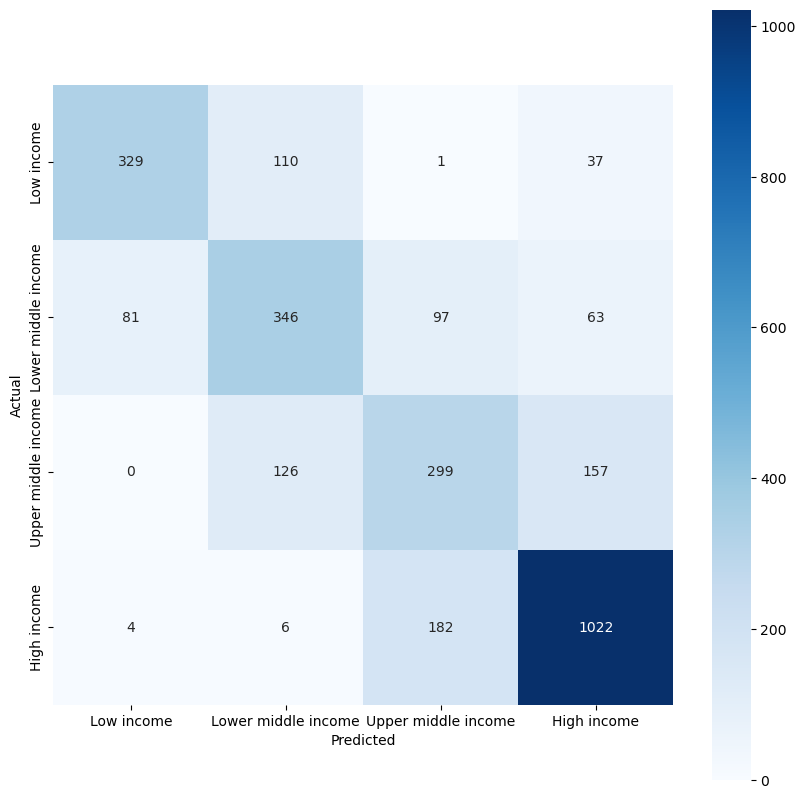

<Figure size 640x480 with 0 Axes>

In [559]:
# Get all scores for the model

from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

precision_score(y_test['Income Group'], y_test['Predicted Income Group'], average='macro')

recall_score(y_test['Income Group'], y_test['Predicted Income Group'], average='macro')

f1_score(y_test['Income Group'], y_test['Predicted Income Group'], average='macro')

# Plot confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Encode Income Group and Predicted Income Group in y_test

y_test['Income Group'] = y_test['Income Group'].apply(lambda x: 0 if x == 'Low income' else (1 if x == 'Lower middle income' else (2 if x == 'Upper middle income' else 3)))
y_test['Predicted Income Group'] = y_test['Predicted Income Group'].apply(lambda x: 0 if x == 'Low income' else (1 if x == 'Lower middle income' else (2 if x == 'Upper middle income' else 3)))

cm = confusion_matrix(y_test['Income Group'], y_test['Predicted Income Group'])

# Decode Income Group and Predicted Income Group in cm

cm = pd.DataFrame(cm)
cm = cm.rename(columns={0: 'Low income', 1: 'Lower middle income', 2: 'Upper middle income', 3: 'High income'}, index={0: 'Low income', 1: 'Lower middle income', 2: 'Upper middle income', 3: 'High income'})

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
plt.savefig('../source/MLP_confusion_matrix.svg')

In [560]:
# Get all cases where the prediction is 3 and the actual is 0, and viceversa
## Decode Income Group and Predicted Income Group in y_test

y_test['Income Group'] = y_test['Income Group'].apply(lambda x: 'Low income' if x == 0 else ('Lower middle income' if x == 1 else ('Upper middle income' if x == 2 else 'High income')))
y_test['Predicted Income Group'] = y_test['Predicted Income Group'].apply(lambda x: 'Low income' if x == 0 else ('Lower middle income' if x == 1 else ('Upper middle income' if x == 2 else 'High income')))
y_test[(y_test['Income Group'] == 'Low income') & (y_test['Predicted Income Group'] == 'High income')]


,Country Code,Country Name,Region,Year,Income Group,Predicted Income Group
520,TCD,Chad,Sub-Saharan Africa,2001,Low income,High income
521,TCD,Chad,Sub-Saharan Africa,2002,Low income,High income
522,TCD,Chad,Sub-Saharan Africa,2003,Low income,High income
523,TCD,Chad,Sub-Saharan Africa,2004,Low income,High income
525,TCD,Chad,Sub-Saharan Africa,2006,Low income,High income
881,GMB,"Gambia, The",Sub-Saharan Africa,2002,Low income,High income
1180,IDN,Indonesia,East Asia & Pacific,2001,Low income,High income
1181,IDN,Indonesia,East Asia & Pacific,2002,Low income,High income
1182,IDN,Indonesia,East Asia & Pacific,2003,Low income,High income
1222,IRQ,Iraq,Middle East & North Africa,2003,Low income,High income


In [561]:
y_test

,Country Code,Country Name,Region,Year,Income Group,Predicted Income Group
0,ALB,Albania,Europe & Central Asia,2001,Lower middle income,Low income
1,ALB,Albania,Europe & Central Asia,2002,Lower middle income,Low income
2,ALB,Albania,Europe & Central Asia,2003,Lower middle income,Low income
3,ALB,Albania,Europe & Central Asia,2004,Lower middle income,Low income
4,ALB,Albania,Europe & Central Asia,2005,Lower middle income,Lower middle income
...,...,...,...,...,...,...
2855,ZWE,Zimbabwe,Sub-Saharan Africa,2016,Lower middle income,Lower middle income
2856,ZWE,Zimbabwe,Sub-Saharan Africa,2017,Lower middle income,Lower middle income
2857,ZWE,Zimbabwe,Sub-Saharan Africa,2018,Lower middle income,Lower middle income
2858,ZWE,Zimbabwe,Sub-Saharan Africa,2019,Lower middle income,Lower middle income


In [562]:
# Use another model

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state=1)

rfc.fit(X, y)

X_test = not_selected_countries.drop(['Income Group'], axis=1)
X_test = X_test.drop(['Country Code', 'Country Name', 'Region', 'Year'], axis=1)
X_test = scaler.transform(X_test)
X_test = pca.transform(X_test)
X_test = pd.DataFrame(X_test)

y_test = not_selected_countries['Income Group']

y_pred = rfc.predict(X_test)
y_test = pd.DataFrame(y_test)
y_pred = pd.DataFrame(y_pred, columns=['Predicted Income Group'])

y_test = y_test.reset_index(drop=True)
y_pred = y_pred.reset_index(drop=True)

y_test = pd.merge(y_test, y_pred, left_index=True, right_index=True)

y_test = pd.merge(y_test, not_selected_countries[['Country Code', 'Country Name', 'Region', 'Year']], left_index=True, right_index=True)

y_test = y_test[['Country Code', 'Country Name', 'Region', 'Year', 'Income Group', 'Predicted Income Group']]

y_test



,Country Code,Country Name,Region,Year,Income Group,Predicted Income Group
0,ALB,Albania,Europe & Central Asia,2001,Lower middle income,Lower middle income
1,ALB,Albania,Europe & Central Asia,2002,Lower middle income,Upper middle income
2,ALB,Albania,Europe & Central Asia,2003,Lower middle income,Lower middle income
3,ALB,Albania,Europe & Central Asia,2004,Lower middle income,Lower middle income
4,ALB,Albania,Europe & Central Asia,2005,Lower middle income,Lower middle income
...,...,...,...,...,...,...
2855,ZWE,Zimbabwe,Sub-Saharan Africa,2016,Lower middle income,Lower middle income
2856,ZWE,Zimbabwe,Sub-Saharan Africa,2017,Lower middle income,Lower middle income
2857,ZWE,Zimbabwe,Sub-Saharan Africa,2018,Lower middle income,Lower middle income
2858,ZWE,Zimbabwe,Sub-Saharan Africa,2019,Lower middle income,Lower middle income


In [563]:
print(classification_report(y_test['Income Group'], y_test['Predicted Income Group']))

                     precision    recall  f1-score   support

        High income       0.90      0.78      0.84      1214
         Low income       0.75      0.70      0.72       477
Lower middle income       0.49      0.70      0.57       587
Upper middle income       0.49      0.43      0.46       582

           accuracy                           0.68      2860
          macro avg       0.66      0.66      0.65      2860
       weighted avg       0.71      0.68      0.69      2860



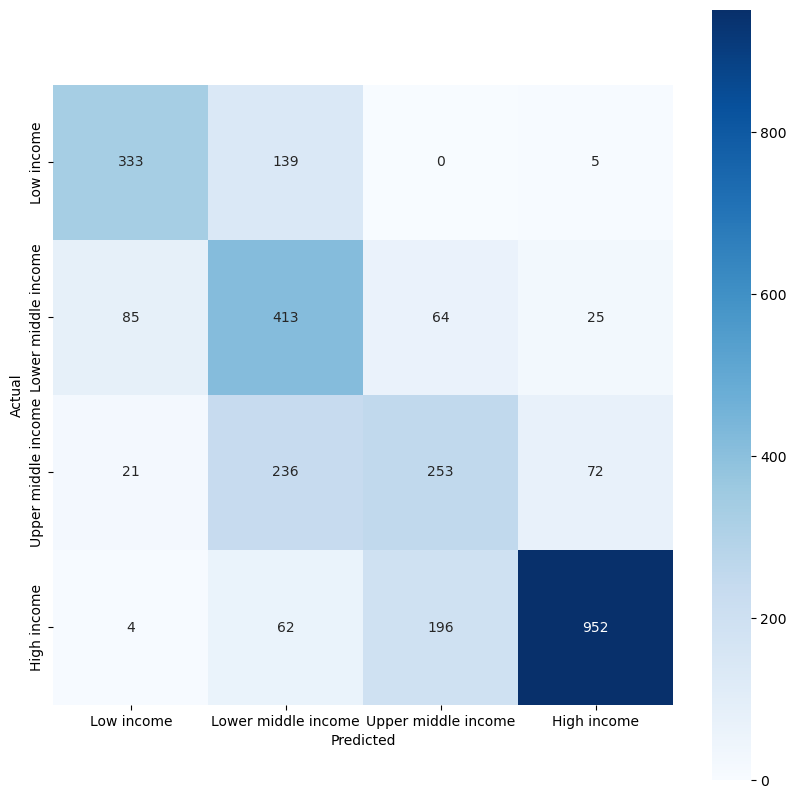

<Figure size 640x480 with 0 Axes>

In [564]:
y_test['Income Group'] = y_test['Income Group'].apply(lambda x: 0 if x == 'Low income' else (1 if x == 'Lower middle income' else (2 if x == 'Upper middle income' else 3)))
y_test['Predicted Income Group'] = y_test['Predicted Income Group'].apply(lambda x: 0 if x == 'Low income' else (1 if x == 'Lower middle income' else (2 if x == 'Upper middle income' else 3)))

cm = confusion_matrix(y_test['Income Group'], y_test['Predicted Income Group'])

cm = pd.DataFrame(cm)
cm = cm.rename(columns={0: 'Low income', 1: 'Lower middle income', 2: 'Upper middle income', 3: 'High income'}, index={0: 'Low income', 1: 'Lower middle income', 2: 'Upper middle income', 3: 'High income'})

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
plt.savefig('../source/RF_confusion_matrix.svg')

In [565]:
# Logistic Regression Classifier

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=1)

lr.fit(X, y)

X_test = not_selected_countries.drop(['Income Group'], axis=1)
X_test = X_test.drop(['Country Code', 'Country Name', 'Region', 'Year'], axis=1)
X_test = scaler.transform(X_test)
X_test = pca.transform(X_test)

y_test = not_selected_countries['Income Group']

y_pred = lr.predict(X_test)
y_test = pd.DataFrame(y_test)

y_pred = pd.DataFrame(y_pred, columns=['Predicted Income Group'])

y_test = y_test.reset_index(drop=True)

y_pred = y_pred.reset_index(drop=True)

y_test = pd.merge(y_test, y_pred, left_index=True, right_index=True)

y_test = pd.merge(y_test, not_selected_countries[['Country Code', 'Country Name', 'Region', 'Year']], left_index=True, right_index=True)

y_test = y_test[['Country Code', 'Country Name', 'Region', 'Year', 'Income Group', 'Predicted Income Group']]

y_test

/Users/juansalazar/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Country Code,Country Name,Region,Year,Income Group,Predicted Income Group
0,ALB,Albania,Europe & Central Asia,2001,Lower middle income,Lower middle income
1,ALB,Albania,Europe & Central Asia,2002,Lower middle income,Low income
2,ALB,Albania,Europe & Central Asia,2003,Lower middle income,Lower middle income
3,ALB,Albania,Europe & Central Asia,2004,Lower middle income,Lower middle income
4,ALB,Albania,Europe & Central Asia,2005,Lower middle income,Lower middle income
...,...,...,...,...,...,...
2855,ZWE,Zimbabwe,Sub-Saharan Africa,2016,Lower middle income,Lower middle income
2856,ZWE,Zimbabwe,Sub-Saharan Africa,2017,Lower middle income,Lower middle income
2857,ZWE,Zimbabwe,Sub-Saharan Africa,2018,Lower middle income,Lower middle income
2858,ZWE,Zimbabwe,Sub-Saharan Africa,2019,Lower middle income,Lower middle income


In [566]:
print(classification_report(y_test['Income Group'], y_test['Predicted Income Group']))

                     precision    recall  f1-score   support

        High income       0.83      0.85      0.84      1214
         Low income       0.73      0.61      0.67       477
Lower middle income       0.60      0.60      0.60       587
Upper middle income       0.60      0.64      0.62       582

           accuracy                           0.72      2860
          macro avg       0.69      0.68      0.68      2860
       weighted avg       0.72      0.72      0.72      2860



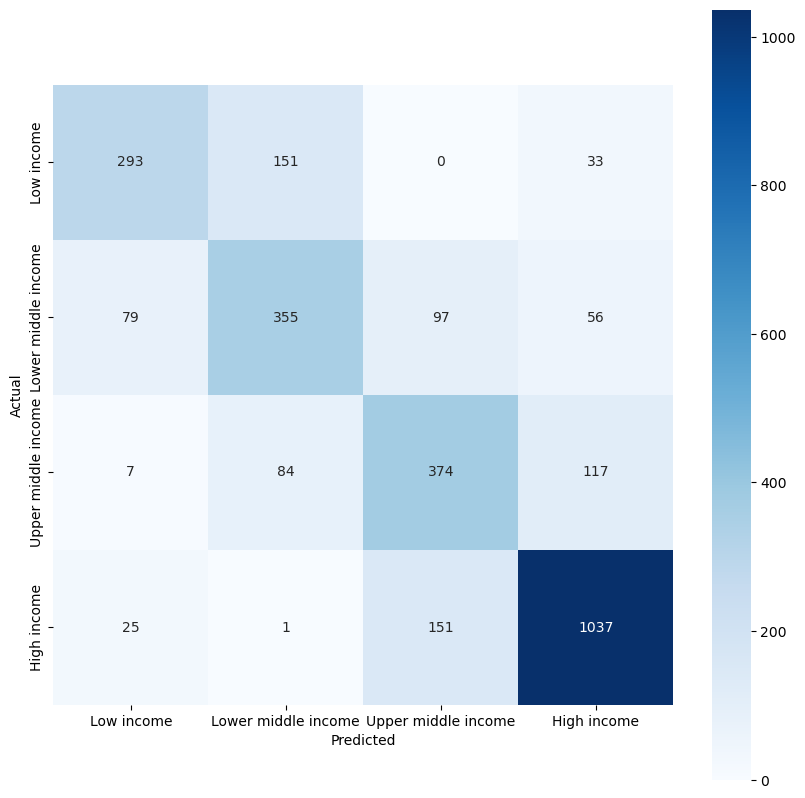

<Figure size 640x480 with 0 Axes>

In [567]:
y_test['Income Group'] = y_test['Income Group'].apply(lambda x: 0 if x == 'Low income' else (1 if x == 'Lower middle income' else (2 if x == 'Upper middle income' else 3)))
y_test['Predicted Income Group'] = y_test['Predicted Income Group'].apply(lambda x: 0 if x == 'Low income' else (1 if x == 'Lower middle income' else (2 if x == 'Upper middle income' else 3)))

cm = confusion_matrix(y_test['Income Group'], y_test['Predicted Income Group'])

cm = pd.DataFrame(cm)
cm = cm.rename(columns={0: 'Low income', 1: 'Lower middle income', 2: 'Upper middle income', 3: 'High income'}, index={0: 'Low income', 1: 'Lower middle income', 2: 'Upper middle income', 3: 'High income'})

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
plt.savefig('../source/LR_confusion_matrix.svg')